<a href="https://colab.research.google.com/github/Ashara-kosi/ML-projects/blob/main/e_commerce_recomender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libraries required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#loading the datasets
category = pd.read_csv('karma_table_category.csv',delimiter=";")
table_order = pd.read_csv('karma_table_order.csv',delimiter=";")
order_item = pd.read_csv('karma_table_order_item.csv',delimiter=";")
product_table = pd.read_csv('karma_table_product.csv',delimiter=";")
user_table = pd.read_csv('karma_table_user.csv',delimiter=";")

In [3]:
category.head()

,category_id,name,image
0,2,Fruits,258a4736-3b80-41ba-977e-5974547e5003.png
1,4,Drinks,6719f143-8b92-479d-91a8-4101446c6630.png
2,6,Meat and Poultry,8f36032e-d64a-4cce-bf59-1dd1fc2bd0f9.png
3,8,Legumes,aac0d090-5407-4390-85aa-eae0659f5297.png
4,9,Oil,1d7e0152-219e-49a9-8f27-8aa541f41073.png


In [4]:
table_order.head()

,order_id,status,date_created,user_id,total
0,1,pending,2021-04-27 07:04:28,2,3300
1,2,pending,2021-04-27 23:12:57,8,2900
2,3,pending,2021-04-27 23:16:32,4,2100
3,4,pending,2021-04-27 23:17:34,4,5250
4,5,pending,2021-04-27 23:21:39,6,7140


In [5]:
order_item.head()

,order_item_id,order_id,product_id,quantity,total
0,1,1,36,1,300
1,2,1,5,1,1350
2,3,1,12,1,150
3,4,1,18,1,450
4,5,1,10,1,1050


In [6]:
product_table.head()

,product_id,title,description,price,in_stock,category_id
0,1,Banana,\n \n,600,25,2
1,2,Coca-Cola,\n \n,200,30,4
2,3,Chicken,NaN,3000,10,6
3,4,Green peas,NaN,400,5,8
4,5,Kings Oil 1L,NaN,1350,7,9


In [7]:
user_table.head()

,user_id,username,fullname,password,email,phone,date_joined,is_admin,email_is_verified
0,1,Admin,Admin,pbkdf2:sha256:150000$QhSGbjIz$446d1c7efdff249f...,admin@gmail.com,8160262187,2021-04-24 15:13:58,1,0
1,2,user1,Grace Oluwaseun,pbkdf2:sha256:150000$iFZkAhdh$eff2ff588fbb982b...,user1@gmail.com,8169950674,2021-04-27 07:00:40,0,0
2,3,user2,Grace Oluwaseun,pbkdf2:sha256:150000$AtpAsjIF$8f38a4bcedfc6068...,user2@gmail.com,8169950674,2021-04-27 16:44:56,0,0
3,4,user3,Grace Oluwaseun,pbkdf2:sha256:150000$hgQAEHVw$a7ce37582439379d...,user3@gmail.com,8169950674,2021-04-27 16:47:07,0,0
4,5,user4,Grace Oluwaseun,pbkdf2:sha256:150000$NrR67yrp$c6393f5ec943d688...,user4@gmail.com,8169950674,2021-04-27 16:48:16,0,0


In [8]:
#merging table_order and order_item using order_id
first_merge = pd.merge(table_order,order_item, on= 'order_id', how= 'outer')

In [9]:
first_merge.head()

,order_id,status,date_created,user_id,total_x,order_item_id,product_id,quantity,total_y
0,1,pending,2021-04-27 07:04:28,2,3300,1,36,1,300
1,1,pending,2021-04-27 07:04:28,2,3300,2,5,1,1350
2,1,pending,2021-04-27 07:04:28,2,3300,3,12,1,150
3,1,pending,2021-04-27 07:04:28,2,3300,4,18,1,450
4,1,pending,2021-04-27 07:04:28,2,3300,5,10,1,1050


In [10]:
#merging the first merge with product_table based on product_id
second_merge = pd.merge(first_merge,product_table, on= 'product_id', how= 'outer')

In [11]:
second_merge.head()

,order_id,status,date_created,user_id,total_x,order_item_id,product_id,quantity,total_y,title,description,price,in_stock,category_id
0,1,pending,2021-04-27 07:04:28,2,3300,1,36,1,300,Golden Penny Spaghetti 500g,NaN,300,24,10
1,12,pending,2021-04-28 01:07:42,13,3550,40,36,2,600,Golden Penny Spaghetti 500g,NaN,300,24,10
2,30,pending,2021-04-30 00:37:58,60,1800,89,36,2,600,Golden Penny Spaghetti 500g,NaN,300,24,10
3,35,pending,2021-04-30 17:21:29,35,3950,101,36,1,300,Golden Penny Spaghetti 500g,NaN,300,24,10
4,45,pending,2021-05-06 12:15:26,104,2300,122,36,1,300,Golden Penny Spaghetti 500g,NaN,300,24,10


In [12]:
#merging the second_merge with user_table on user_id
new_data = pd.merge(second_merge,user_table, on= 'user_id', how= 'outer')

In [13]:
new_data.head()

,order_id,status,date_created,user_id,total_x,order_item_id,product_id,quantity,total_y,title,description,price,in_stock,category_id,username,fullname,password,email,phone,date_joined,is_admin,email_is_verified
0,1.0,pending,2021-04-27 07:04:28,2,3300.0,1.0,36.0,1.0,300.0,Golden Penny Spaghetti 500g,NaN,300.0,24.0,10.0,user1,Grace Oluwaseun,pbkdf2:sha256:150000$iFZkAhdh$eff2ff588fbb982b...,user1@gmail.com,8169950674,2021-04-27 07:00:40,0,0
1,1.0,pending,2021-04-27 07:04:28,2,3300.0,2.0,5.0,1.0,1350.0,Kings Oil 1L,NaN,1350.0,7.0,9.0,user1,Grace Oluwaseun,pbkdf2:sha256:150000$iFZkAhdh$eff2ff588fbb982b...,user1@gmail.com,8169950674,2021-04-27 07:00:40,0,0
2,1.0,pending,2021-04-27 07:04:28,2,3300.0,3.0,12.0,1.0,150.0,Fanta Pet Bottle 50cl,NaN,150.0,24.0,4.0,user1,Grace Oluwaseun,pbkdf2:sha256:150000$iFZkAhdh$eff2ff588fbb982b...,user1@gmail.com,8169950674,2021-04-27 07:00:40,0,0
3,1.0,pending,2021-04-27 07:04:28,2,3300.0,4.0,18.0,1.0,450.0,Lettuce,\n \n,450.0,20.0,12.0,user1,Grace Oluwaseun,pbkdf2:sha256:150000$iFZkAhdh$eff2ff588fbb982b...,user1@gmail.com,8169950674,2021-04-27 07:00:40,0,0
4,1.0,pending,2021-04-27 07:04:28,2,3300.0,5.0,10.0,1.0,1050.0,Titus Fish - Frozen,NaN,1050.0,7.0,13.0,user1,Grace Oluwaseun,pbkdf2:sha256:150000$iFZkAhdh$eff2ff588fbb982b...,user1@gmail.com,8169950674,2021-04-27 07:00:40,0,0


In [14]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1180 entries, 0 to 1179
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_id           265 non-null    float64
 1   status             265 non-null    object 
 2   date_created       265 non-null    object 
 3   user_id            1180 non-null   int64  
 4   total_x            265 non-null    float64
 5   order_item_id      265 non-null    float64
 6   product_id         265 non-null    float64
 7   quantity           265 non-null    float64
 8   total_y            265 non-null    float64
 9   title              265 non-null    object 
 10  description        43 non-null     object 
 11  price              265 non-null    float64
 12  in_stock           265 non-null    float64
 13  category_id        265 non-null    float64
 14  username           1180 non-null   object 
 15  fullname           1180 non-null   object 
 16  password           1180 

In [15]:
new_data.shape

(1180, 22)

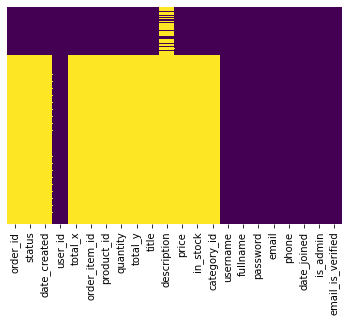

In [16]:
sns.heatmap(new_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#

In [17]:
#data cleaning dropping unnecessary columns
new_data = new_data.drop(['status','date_created','total_x','total_y',
                  'description','in_stock','username','fullname',
                  'password','email','phone','date_joined','is_admin','email_is_verified'],axis=1)

In [18]:
new_data.shape

(1180, 8)

In [19]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1180 entries, 0 to 1179
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       265 non-null    float64
 1   user_id        1180 non-null   int64  
 2   order_item_id  265 non-null    float64
 3   product_id     265 non-null    float64
 4   quantity       265 non-null    float64
 5   title          265 non-null    object 
 6   price          265 non-null    float64
 7   category_id    265 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 83.0+ KB


In [20]:
new_data.head(15)

,order_id,user_id,order_item_id,product_id,quantity,title,price,category_id
0,1.0,2,1.0,36.0,1.0,Golden Penny Spaghetti 500g,300.0,10.0
1,1.0,2,2.0,5.0,1.0,Kings Oil 1L,1350.0,9.0
2,1.0,2,3.0,12.0,1.0,Fanta Pet Bottle 50cl,150.0,4.0
3,1.0,2,4.0,18.0,1.0,Lettuce,450.0,12.0
4,1.0,2,5.0,10.0,1.0,Titus Fish - Frozen,1050.0,13.0
5,12.0,13,40.0,36.0,2.0,Golden Penny Spaghetti 500g,300.0,10.0
6,12.0,13,41.0,5.0,1.0,Kings Oil 1L,1350.0,9.0
7,12.0,13,39.0,57.0,1.0,Gino Tomato Paste Sachet 70g x 10,1600.0,9.0
8,30.0,60,89.0,36.0,2.0,Golden Penny Spaghetti 500g,300.0,10.0
9,30.0,60,88.0,56.0,1.0,Gino Magic Peppe & Onion Tomato Mix Sachet 70g...,1200.0,9.0


In [21]:
new_data.isnull().sum()

order_id         915
user_id            0
order_item_id    915
product_id       915
quantity         915
title            915
price            915
category_id      915
dtype: int64

In [22]:
new_data.dropna(axis='rows',inplace=True)


In [23]:
new_data.isnull().sum()

order_id         0
user_id          0
order_item_id    0
product_id       0
quantity         0
title            0
price            0
category_id      0
dtype: int64

In [24]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 265 entries, 0 to 264
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       265 non-null    float64
 1   user_id        265 non-null    int64  
 2   order_item_id  265 non-null    float64
 3   product_id     265 non-null    float64
 4   quantity       265 non-null    float64
 5   title          265 non-null    object 
 6   price          265 non-null    float64
 7   category_id    265 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 18.6+ KB


In [25]:
new_data['product_id'].value_counts()

29.0    9
5.0     8
58.0    8
55.0    8
24.0    8
49.0    8
36.0    7
50.0    7
32.0    7
42.0    7
28.0    6
37.0    6
52.0    6
35.0    6
18.0    6
39.0    6
40.0    6
8.0     6
46.0    5
21.0    5
19.0    5
34.0    5
1.0     5
15.0    5
47.0    5
13.0    5
31.0    5
27.0    4
11.0    4
48.0    4
51.0    4
41.0    4
22.0    4
56.0    4
10.0    4
25.0    4
54.0    4
4.0     4
23.0    4
33.0    4
12.0    3
57.0    3
16.0    3
20.0    3
26.0    3
6.0     3
44.0    3
43.0    3
2.0     3
53.0    3
30.0    2
38.0    2
9.0     2
3.0     2
17.0    2
14.0    2
45.0    1
Name: product_id, dtype: int64

In [27]:
new_data['frequency_count']= new_data['product_id'].value_counts()
#new3.isnull().sum()
new_data

,order_id,user_id,order_item_id,product_id,quantity,title,price,category_id,frequency_count
0,1.0,2,1.0,36.0,1.0,Golden Penny Spaghetti 500g,300.0,10.0,NaN
1,1.0,2,2.0,5.0,1.0,Kings Oil 1L,1350.0,9.0,5.0
2,1.0,2,3.0,12.0,1.0,Fanta Pet Bottle 50cl,150.0,4.0,3.0
3,1.0,2,4.0,18.0,1.0,Lettuce,450.0,12.0,2.0
4,1.0,2,5.0,10.0,1.0,Titus Fish - Frozen,1050.0,13.0,4.0
...,...,...,...,...,...,...,...,...,...
260,80.0,133,241.0,35.0,1.0,Maltina Classic Malt Drink Can 33 cl x24,3650.0,4.0,NaN
261,34.0,34,99.0,56.0,1.0,Gino Magic Peppe & Onion Tomato Mix Sachet 70g...,1200.0,9.0,NaN
262,37.0,37,104.0,6.0,1.0,Rice,13500.0,10.0,NaN
263,38.0,38,105.0,43.0,1.0,Nasco Corn Flakes Original 500g,1150.0,10.0,NaN


In [40]:
#grouping the user_id by product_id to count the frequency of each product selection of each user
test = new_data.groupby(['user_id', 'product_id']).agg({'product_id':'count'}).rename(columns={'product_id': 'purchase_count'})

test.head(10)

purchase_count
user_id product_id                
1       39.0                     1
        40.0                     1
        42.0                     1
2       5.0                      1
        10.0                     1
        12.0                     1
        18.0                     1
        36.0                     1
4       29.0                     1
        30.0                     1

In [41]:

test.tail(10)

purchase_count
user_id product_id                
138     12.0                     1
139     51.0                     1
        55.0                     1
140     15.0                     1
        18.0                     1
        32.0                     1
        47.0                     1
141     5.0                      1
        19.0                     1
        25.0                     1